In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import math
from tqdm import tqdm
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
import datetime
pd.options.mode.chained_assignment = None  # default='warn'
import gc
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False
font_path = './NanumFontSetup_TTF_BARUNGOTHIC/NanumBarunGothic.ttf'
import matplotlib.font_manager as fm
fontprop = fm.FontProperties(fname=font_path, size=18)
import seaborn as sns

In [2]:
%%time
# Read Data
basedir = './Training/training_data_ver_21/'
training_data_df = pd.read_csv(basedir + 'training_data_ver_21.csv')
training_data_df['계약날짜'] = pd.to_datetime(training_data_df['계약날짜'])
training_data_df['지번주소'] = training_data_df['지번주소'] + '_' + training_data_df['건축년도'].apply(int).apply(str)
print(training_data_df.shape)
training_data_df.head()

(1047633, 297)
Wall time: 12.3 s


,지번주소,도로명주소,건물(단지)명,전용면적(㎡),거래금액(만원),층,건축년도,계약날짜기준_건물연식,계약날짜,부동산유형,전용면적_classes,가격_면적,구,동,year_linear,year_sin,year_cos,distance_nearest_station,nearest_station_name,xnorm,ynorm,x_2nd,y_2nd,xy,년,지목명,토지면적_log,용도지역명1,토지이동상황,지형높이,지형형상,도로접면,(한강)오염행위_제한지역,(한강)폐기물매립시설_설치제한지역,4대문안,가로구역별_최고높이_제한지역,가스공급설비,가축사육제한구역,개발제한구역,개발진흥지구,개발행위허가제한지역,건축선,건축용도지역기타,건축용도지역미분류,건축허가_착공제한지역,경관녹지,경관지구,경관지구기타,고도지구,고등학교,고속철도,공공공지,공공문화체육시설미분류,공공시설구역,공공주택지구,공공지원민간임대주택_공급촉진지구,공공청사,공용시설보호지구,공원,공원마을지구(공원집단시설지구),공원자연보존지구,공원자연환경지구,공익용산지,공장설립승인지역,공장설립제한지역,공항소음피해예상지역,공항시설보호지구,과밀억제권역,광로1류(폭_70M_이상),광로2류(폭_50M_70M),광로3류(폭_40M_50M),광역계획구역,광장,교육환경보호구역,교통광장,국가산업단지,국가지정문화재구역,국가하천,국립공원,국민임대주택단지예정지구,국지도로,국토이용용도지구기타,근린공원,근린광장,근린상업지역,기타공공공지시설,기타공원시설,기타교통시설,기타녹지시설,기타도로시설,기타도시공간시설,기타문화시설,기타시장시설,기타용도지역지구기타,기타용지,기타유통업무설비,기타자동차정류장,기타주차장시설,기타철도시설,기타폐기물처리시설,노외주차장,녹지,대공방어협조구역,대공방어협조구역(위탁고도_54_236m),대공방어협조구역(위탁고도_77_257m),대로1류(폭_35M_40M),대로2류(폭_30M_35M),대로3류(폭_25M_30M),대학,도로,도로구역,도서관,도시개발구역,도시개발구역기타,도시고속도로,도시관리계획_입안중,도시기타용도지역지구기타,도시기타용도지역지구미분류,도시기타용도지역지구용도지역지구,도시자연공원,도시자연공원구역,도시지역,도시지역기타,도시철도,리모델링지구,문화공원,문화시설,문화재,문화재보존영향_검토대상구역,문화재보호구역,문화지구,미관지구,미관지구기타,방송통신시설,방수설비,방재지구,방화지구,보전산지,보전임지,보행자전용도로,부설주차장,비오톱1등급,비행안전제2구역(전술),비행안전제2구역(지원),비행안전제3구역(전술),비행안전제3구역(지원),비행안전제4구역(지원),비행안전제5구역(전술),비행안전제5구역(지원),비행안전제6구역(전술),사고지,사방지,사업지역기타,사업지역미분류,사회복지시설,산업개발진흥지구,산업시설구역,상대보호구역,상대정화구역,상수원보호구역,상수원보호기타,생산녹지지역,소공원,소로1류(폭_10M_12M),소로2류(폭_8M_10M),소로3류(폭_8M_미만),소하천,소하천구역,수도공급시설,수평표면구역,시장,시장정비구역,시장정비구역기타,아파트지구,야생생물보호구역,어린이공원,여객자동차터미널,역사도심,역사문화미관지구,역사문화특화경관지구,역사문화환경보존지역,연결녹지,연구개발특구,연구시설,열공급설비,온천공보호구역,완충녹지,용도구역기타,용도구역미분류,운동장,원추표면구역,원형보존지,유수지,유원지,유치원,유통단지,유통상업지역,유통업무설비,일단의공업용지조성사업지역,일단의주택단지조성사업지역,일반도로,일반미관지구,일반산업단지,일반상업지역,일반주거지역,일반철도,임업용산지,자동차검사시설,자동차정류장,자연경관지구,자연녹지지역,자연재해위험지구,장애물제한표면구역,재개발구역,재개발구역기타,재정비촉진지구,재정비촉진지구기타,전기공급설비,전용주거지역,전이표면구역,전통사찰보존구역,절대보호구역,절대정화구역,정비구역,정비구역기타,정비예정구역,제1종일반주거지역,제1종전용주거지역,제1종지구단위계획구역,제2종일반주거지역,제2종전용주거지역,제3종_구역,제3종일반주거지역,제방,제한보호구역,제한보호구역(전술항공_5km),제한보호구역(후방지역_500m),조례로정한지역,조망가로미관지구,조망가로특화경관지구,종합운동장,종합의료시설,주거용지,주거환경개선지구,주차장,주차장기타,주차환경개선지구,준공업지역,준보전산지,준주거지역,중로1류(폭_20M_25M),중로2류(폭_15M_20M),중로3류(폭_12M_15M),중심지미관지구,중요시설물보존지구,중요시설물보호지구,중요시설물보호지구(공용),중요시설물보호지구(공항),중점경관관리구역,중학교,지구단위계획구역,지역특화발전특구,지원시설구역,지정문화재구역,지하광장,지하도로,진입표면구역,집단취락지구,철도,철도보호지구,청사,청소년수련시설,체육공원,체육시설,초등학교,최고고도지구,침수위험지구,택지개발예정지구,택지개발예정지구기타,토지거래계약에관한허가구역,통제보호구역,통제보호구역(민통선이남_300m),특수도로(보행자전용도로),특정개발진흥지구,특정용도제한지구,특화경관지구,폐기물처리시설,하수도,하수종말처리시설,하천,하천구역,학교,학교시설보호지구,학교이적지,학교환경위생_정화구역,현상변경허가_대상구역,홍수관리구역
0,서울특별시 강남구 개포동 171-13_1988,서울특별시 강남구 선릉로14길 11-0,(171-13),44.80,23300,1,1988.0,28.0,2016-01-16,1,8,520.089286,0,9,10.046575,0.288482,0.957485,363.965643,37,6236.633208,-8586.489321,1.944780e+07,3.686390e+07,-5.355078e+07,2016,3,5.201256,7,3,4,7,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,서울특별시 강남구 개포동 171-13_1988,서울특별시 강남구 선릉로14길 11-0,(171-13),44.80,24500,1,1988.0,28.0,2016-04-09,1,8,546.875000,0,9,10.276712,0.985948,-0.167052,363.965643,37,6236.633208,-8586.489321,1.944780e+07,3.686390e+07,-5.355078e+07,2016,3,5.201256,7,3,4,7,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,서울특별시 강남구

In [3]:
def landnum_modifier(x):
    # x is a string
    
    if pd.isna(x) == True:
        return x
    else:
        x = str(x).replace('외', '').replace(' ','')
        splitted = x.split('-')
        if len(splitted) == 1:
            return x + '-0'
        else:
            return x

In [4]:
def get_year(x):
    if pd.isna(x) == True:
        return x
    else:
        return int(x.split('.')[0])

In [5]:
def date_modifier(x):
    # x is a string or datetime
    if pd.isna(x) == True:
        return x
    else:
        x = str(x)
        if '-' in x:
            x = x.replace('-', '.')
            
        splitted = x.split('.')
        
        if len(splitted) == 1:
            return np.nan
        else:
            return x.split(' ')[0]

In [6]:
def get_bd_type(x):
    # x is a string
    
    if pd.isna(x) == True:
        return x
    else:
        if '오피' in x:
            return '오피스텔'
        else:
            return '연립다세대'

In [7]:
reference_df = pd.read_excel('./감정평가사_자료/이승준_총괄표.xlsx', header=[0,1]).dropna(subset=[('소재지','소재지')]).sort_values([('소재지', '지역'),('소재지', '소재지'), ('소재지', '지번')]).reset_index(drop=True)
reference_df.columns = [col[0] + '_' + col[1] for col in reference_df.columns]
reference_df['소재지_지번'] = reference_df['소재지_지번'].apply(landnum_modifier)
reference_df['지번주소'] = '서울특별시 ' + reference_df['소재지_지역'] + ' ' + reference_df['소재지_소재지']\
+ ' ' + reference_df['소재지_지번']
reference_df['기준시점2'] = reference_df['수입/비용_기준시점'].apply(date_modifier)
reference_df['년'] = reference_df['기준시점2'].apply(get_year)
reference_df = reference_df.dropna(subset=['기준시점2'])
reference_df['건물유형'] = reference_df['건물내용_건물용도'].apply(get_bd_type)
reference_df['건축년도'] = reference_df['사업진행일자_사용승인일'].apply(str).str[:4]
reference_df['지번주소'] = reference_df['지번주소'] + '_' + reference_df['건축년도']
print(reference_df.shape)
reference_df.head()

(131, 44)


,소재지_지역,소재지_소재지,소재지_지번,토지내용_용도지역,토지내용_도로너비,토지내용_토지면적(㎡),토지내용_토지매매금액,토지내용_토지매매단가\n(원/㎡),토지내용_공시지가와격차\n(개공/매매),건물내용_건물용도,건물내용_공급면적(㎡),건물내용_전유면적(㎡),건물내용_전용율,건물내용_용적율\n(%),건물내용_건폐율\n(%),건물내용_구분건물호,건물내용_건물동수,건물내용_건물층수,수입/비용_의뢰인,수입/비용_기준시점,수입/비용_전체평가금액,수입/비용_투입비용합계,수입/비용_순이익,수입/비용_순이익율,평가단가(원/전유㎡) _전유면적,평가단가(원/전유㎡) _공급면적,매출원가(원/전유㎡) _전유면적기준,매출원가(원/전유㎡) _공급면적기준,사업진행일자_토지계약일자,사업진행일자_허가일자,사업진행일자_착공일자,사업진행일자_사용승인일,건축비\n(원/평)_Unnamed: 32_level_1,원가비율_토지원가비율,원가비율_건축원가비율,원가비율_부대비용,원가비율_금융비용,원가비율_합계,비고_Unnamed: 38_level_1,지번주소,기준시점2,년,건물유형,건축년도
0,강남구,개포동,1195-10,2종일주,6미터,265.7,2.970000e+09,11178020.0,0.433,다세대주택,519.54,432.22,0.832,195.54,59.62,15개호,1개동,지상5층,SH공사,2020.09.23,4.719500e+09,4.167814e+09,5.516858e+08,0.117,10919208.0,9.083997e+06,9.642807e+06,8372395.0,2019.02.26,2019.06.18,2019.06.18,2020.01.13,5500000.0,0.7563,0.2139,0.0060,0.0239,1.0,NaN,서울특별시 강남구 개포동 1195-10_2020,2020.09.23,2020,연립다세대,2020
1,강남구,개포동,1199-7,2종일주,4미터,248.0,2.550000e+09,10282258.0,0.365,다세대주택,463.84,390.67,0.842,187.04,59.61,14개호,1개동,지상5층,LH공사,2019.11.29,4.040000e+09,3.593249e+09,4.467511e+08,0.111,10341209.0,8.709524e+06,9.197658e+06,8074624.0,2018.08.21,2018.12.31,2019.01.07,2019.06.04,5400000.0,0.7520,0.2175,0.0061,0.0244,1.0,NaN,서울특별시 강남구 개포동 1199-7_2019,2019.11.29,2019,연립다세대,2019
2,강남구,개포동,1216-7,2종일주,8미터,258.1,2.931000e+09,11356064.0,0.472,도시행생활주택,489.46,400.29,0.818,199.62,59.89,15개호,1개동,지상5층,SH공사,2019.11.29,4.586000e+09,4.054965e+09,5.310348e+08,0.116,11456694.0,9.369509e+06,1.013007e+07,8312283.0,2019.01.24,2019.06.17,2019.07.23,2020.02.25,5400000.0,0.7667,0.2034,0.0057,0.0242,1.0,NaN,서울특별시 강남구 개포동 1216-7_2020,2019.11.29,2019,연립다세대,2020
3,강남구,역삼동,707-9,일반상업,8미터,363.5,9.500000e+09,26134801.0,0.580,도시행생활주택,1695.85,1289.62,0.760,199.62,59.89,15개호,1개동,지상5층,LH공사,2019.11.29,2.219983e+10,1.398811e+10,8.211721e+09,0.370,17214239.0,1.115945e+07,1.084669e+07,16602582.0,2019.08.14,2019.07.15,2020.01.03,2020.10.07,5800000.0,0.7189,0.2568,0.0072,0.0170,1.0,NaN,서울특별시 강남구 역삼동 707-9_2020,2019.11.29,2019,연립다세대,2020
4,강남구,역삼동,751-6,2종일주,6미터,391.8,5.900000e+09,15058703.0,0.441,도시행생활주택,658.88,537.65,0.816,168.17,46.35,20개호,1개동,지상6층,LH공사,2019.11.29,9.810500e+09,7.604511e+09,2.205989e+09,0.225,18247001.0,1.488966e+07,1.414398e+07,12107552.0,2019.01.04,2019.03.05,2019.04.20,2019.11.29,5500000.0,0.8249,0.1486,0.0042,0.0223,1.0,NaN,서울특별시 강남구 역삼동 751-6_2019,2019.11.29,2019,연립다세대,2019


In [8]:
training_data_df = training_data_df[training_data_df['지번주소'].isin(reference_df['지번주소'].unique()) == False].reset_index(drop=True)
print(training_data_df.shape)

(1046690, 297)


In [9]:
training_data_df.isna().sum()

지번주소                        0
도로명주소                       0
건물(단지)명                     0
전용면적(㎡)                     0
거래금액(만원)                    0
층                           0
건축년도                        0
계약날짜기준_건물연식                 0
계약날짜                        0
부동산유형                       0
전용면적_classes                0
가격_면적                       0
구                           0
동                           0
year_linear                 0
year_sin                    0
year_cos                    0
distance_nearest_station    0
nearest_station_name        0
xnorm                       0
ynorm                       0
x_2nd                       0
y_2nd                       0
xy                          0
년                           0
지목명                         0
토지면적_log                    0
용도지역명1                      0
토지이동상황                      0
지형높이                        0
지형형상                        0
도로접면                        0
(한강)오염행위_제한지역               0
(한강)폐기물매립시

<AxesSubplot:>

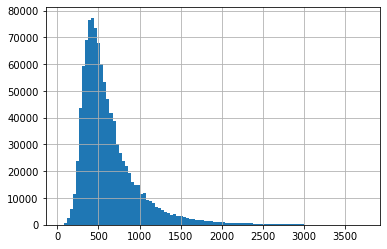

In [10]:
training_data_df['가격_면적'].hist(bins=100)

In [11]:
def price_over_area_feature_engi(x):
    # x is a number
    
    if pd.isna(x) == True:
        return x
    else:
        for i in range(200):
            if x < ((i+1)*15):
                return '{}~{}'.format((i*15), (i+1)*15)
        
        return '3000초과'

In [12]:
training_data_df['가격_면적_classes'] = training_data_df['가격_면적'].apply(price_over_area_feature_engi)

In [13]:
price_area_classes_list = []
for i in range(200):
    price_area_classes_list.append('{}~{}'.format((i*15), (i+1)*15))
price_area_classes_list.append('3000초과')

In [14]:
print(len(price_area_classes_list))

201


In [15]:
reference_unique_values_list = training_data_df['가격_면적_classes'].unique().tolist()
print(len(reference_unique_values_list))

199


In [16]:
v_to_drop = []
for v in price_area_classes_list:
    if v not in reference_unique_values_list:
        v_to_drop.append(v)

In [17]:
v_to_drop

['0~15', '15~30']

In [18]:
for v in v_to_drop:
    price_area_classes_list.remove(v)

In [19]:
print(len(price_area_classes_list))

199


In [20]:
col_map = {}
col_map_df = pd.DataFrame({'cat':price_area_classes_list,
                           'map':[i for i in range(len(price_area_classes_list))]})
for i in range(col_map_df.shape[0]):
    col_map[col_map_df['cat'][i]] = col_map_df['map'][i]
training_data_df['가격_면적_classes'] = training_data_df['가격_면적_classes'].map(col_map)
col_map_df.to_csv('./Training/training_data_ver_21/feature_maps/가격_면적_classes_map.csv')

In [21]:
col_map_df.shape

(199, 2)

In [22]:
training_data_df['가격_면적_classes'].nunique()

199

In [23]:
training_data_df['가격_면적_classes'].value_counts()

25     32157
27     31256
24     30950
26     30725
23     30693
29     29862
28     29628
30     28688
22     28668
31     28437
21     27885
20     26409
32     26325
33     25288
19     24187
34     24060
18     22735
35     22410
36     21425
37     20502
38     20123
17     19663
39     18847
40     17673
41     16942
16     16290
42     15630
45     15451
43     15054
44     14944
15     13179
47     11763
46     11721
48     11535
49     10584
14     10140
50     10041
52      9744
51      9582
53      9015
56      8379
54      8299
55      7752
13      7062
58      6693
64      6576
60      6557
57      6522
59      6341
68      5751
63      5726
62      5610
61      5503
12      5323
67      4766
65      4736
66      4517
70      4115
11      4051
72      3994
69      3752
71      3690
73      3463
74      3399
75      3375
76      3208
10      3138
78      2893
80      2760
79      2620
81      2561
9       2387
77      2384
82      2292
84      2252
83      2109
86      1958

In [24]:
cols_to_drop = ['지번주소', '도로명주소', '건물(단지)명', '전용면적(㎡)', '거래금액(만원)', '계약날짜', '가격_면적', '년', '가격_면적_classes']

# Training

In [25]:
from sklearn.model_selection import KFold, GroupKFold, GroupShuffleSplit

In [26]:
from catboost import CatBoostClassifier, Pool

In [27]:
gkf = GroupKFold(n_splits=5)

In [28]:
target_cols = ['가격_면적_classes']

In [29]:
cat_cols_df = pd.read_csv(basedir + 'cat_cols.csv')
cat_cols_df

,colname
0,부동산유형
1,구
2,동
3,nearest_station_name
4,층
5,지목명
6,용도지역명1
7,토지이동상황
8,지형높이
9,지형형상


In [30]:
cat_cols = cat_cols_df['colname'].tolist()
cat_cols

['부동산유형',
 '구',
 '동',
 'nearest_station_name',
 '층',
 '지목명',
 '용도지역명1',
 '토지이동상황',
 '지형높이',
 '지형형상',
 '도로접면',
 '전용면적_classes',
 '(한강)오염행위_제한지역',
 '(한강)폐기물매립시설_설치제한지역',
 '4대문안',
 '가로구역별_최고높이_제한지역',
 '가스공급설비',
 '가축사육제한구역',
 '개발제한구역',
 '개발진흥지구',
 '개발행위허가제한지역',
 '건축선',
 '건축용도지역기타',
 '건축용도지역미분류',
 '건축허가_착공제한지역',
 '경관녹지',
 '경관지구',
 '경관지구기타',
 '고도지구',
 '고등학교',
 '고속철도',
 '공공공지',
 '공공문화체육시설미분류',
 '공공시설구역',
 '공공주택지구',
 '공공지원민간임대주택_공급촉진지구',
 '공공청사',
 '공용시설보호지구',
 '공원',
 '공원마을지구(공원집단시설지구)',
 '공원자연보존지구',
 '공원자연환경지구',
 '공익용산지',
 '공장설립승인지역',
 '공장설립제한지역',
 '공항소음피해예상지역',
 '공항시설보호지구',
 '과밀억제권역',
 '광로1류(폭_70M_이상)',
 '광로2류(폭_50M_70M)',
 '광로3류(폭_40M_50M)',
 '광역계획구역',
 '광장',
 '교육환경보호구역',
 '교통광장',
 '국가산업단지',
 '국가지정문화재구역',
 '국가하천',
 '국립공원',
 '국민임대주택단지예정지구',
 '국지도로',
 '국토이용용도지구기타',
 '근린공원',
 '근린광장',
 '근린상업지역',
 '기타공공공지시설',
 '기타공원시설',
 '기타교통시설',
 '기타녹지시설',
 '기타도로시설',
 '기타도시공간시설',
 '기타문화시설',
 '기타시장시설',
 '기타용도지역지구기타',
 '기타용지',
 '기타유통업무설비',
 '기타자동차정류장',
 '기타주차장시설',
 '기타철도시설',
 '기타폐기물처리시설',
 '노외주차장',
 '녹지',
 '대공방어협

Fold 4 start
creating fold data...
(837352, 289)
199
y dist plot


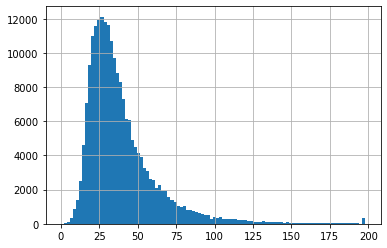

creating model...
start training...
0:	learn: 5.1764748	test: 5.1802151	best: 5.1802151 (0)	total: 3.4s	remaining: 1d 23h 16m 19s
25:	learn: 4.3402240	test: 4.3612546	best: 4.3612546 (25)	total: 1m 24s	remaining: 1d 21h 12m 13s
50:	learn: 4.0994594	test: 4.1301230	best: 4.1301230 (50)	total: 2m 44s	remaining: 1d 20h 52m 3s
75:	learn: 3.9389671	test: 3.9749556	best: 3.9749556 (75)	total: 4m 6s	remaining: 1d 20h 53m 34s
100:	learn: 3.8281177	test: 3.8713140	best: 3.8713140 (100)	total: 5m 27s	remaining: 1d 20h 58m 22s
125:	learn: 3.7451863	test: 3.7923896	best: 3.7923896 (125)	total: 6m 49s	remaining: 1d 21h 3m 20s
150:	learn: 3.6916577	test: 3.7419768	best: 3.7419768 (150)	total: 8m 11s	remaining: 1d 21h 3m 56s
175:	learn: 3.6373795	test: 3.6886936	best: 3.6886936 (175)	total: 9m 34s	remaining: 1d 21h 8m 30s
200:	learn: 3.5405287	test: 3.6057823	best: 3.6057823 (200)	total: 10m 59s	remaining: 1d 21h 23m 49s
225:	learn: 3.4783917	test: 3.5579685	best: 3.5579685 (225)	total: 12m 24s	remai

2000:	learn: 2.9782111	test: 3.2655475	best: 3.2655475 (2000)	total: 1h 49m 7s	remaining: 1d 19h 37m 44s
2025:	learn: 2.9759560	test: 3.2649468	best: 3.2649379 (2024)	total: 1h 50m 29s	remaining: 1d 19h 36m 12s
2050:	learn: 2.9738590	test: 3.2641744	best: 3.2641744 (2050)	total: 1h 51m 49s	remaining: 1d 19h 34m 28s
2075:	learn: 2.9720715	test: 3.2633898	best: 3.2633859 (2074)	total: 1h 53m 11s	remaining: 1d 19h 32m 50s
2100:	learn: 2.9703112	test: 3.2627306	best: 3.2627306 (2100)	total: 1h 54m 31s	remaining: 1d 19h 31m 3s
2125:	learn: 2.9685356	test: 3.2622087	best: 3.2622087 (2125)	total: 1h 55m 53s	remaining: 1d 19h 29m 31s
2150:	learn: 2.9662072	test: 3.2613259	best: 3.2613259 (2150)	total: 1h 57m 14s	remaining: 1d 19h 27m 58s
2175:	learn: 2.9645490	test: 3.2609076	best: 3.2609076 (2175)	total: 1h 58m 34s	remaining: 1d 19h 26m 11s
2200:	learn: 2.9624420	test: 3.2601767	best: 3.2601684 (2199)	total: 1h 59m 56s	remaining: 1d 19h 24m 38s
2225:	learn: 2.9605166	test: 3.2593849	best: 3.2

3950:	learn: 2.8684845	test: 3.2309229	best: 3.2309229 (3950)	total: 3h 33m 59s	remaining: 1d 17h 33m 59s
3975:	learn: 2.8675363	test: 3.2307447	best: 3.2307375 (3964)	total: 3h 35m 19s	remaining: 1d 17h 32m 30s
4000:	learn: 2.8667666	test: 3.2305652	best: 3.2305607 (3999)	total: 3h 36m 39s	remaining: 1d 17h 30m 55s
4025:	learn: 2.8660701	test: 3.2304512	best: 3.2304404 (4022)	total: 3h 37m 59s	remaining: 1d 17h 29m 21s
4050:	learn: 2.8651284	test: 3.2301520	best: 3.2301440 (4046)	total: 3h 39m 20s	remaining: 1d 17h 27m 54s
4075:	learn: 2.8642990	test: 3.2299783	best: 3.2299783 (4075)	total: 3h 40m 40s	remaining: 1d 17h 26m 24s
4100:	learn: 2.8635425	test: 3.2296937	best: 3.2296937 (4100)	total: 3h 42m 1s	remaining: 1d 17h 24m 57s
4125:	learn: 2.8626829	test: 3.2293979	best: 3.2293979 (4125)	total: 3h 43m 22s	remaining: 1d 17h 23m 28s
4150:	learn: 2.8618362	test: 3.2292145	best: 3.2292145 (4150)	total: 3h 44m 42s	remaining: 1d 17h 22m 3s
4175:	learn: 2.8609677	test: 3.2290844	best: 3.2

5900:	learn: 2.8064751	test: 3.2161188	best: 3.2161009 (5891)	total: 5h 18m 25s	remaining: 1d 15h 39m 35s
5925:	learn: 2.8054946	test: 3.2159594	best: 3.2159292 (5919)	total: 5h 19m 45s	remaining: 1d 15h 38m 11s
5950:	learn: 2.8047888	test: 3.2157363	best: 3.2157363 (5950)	total: 5h 21m 5s	remaining: 1d 15h 36m 45s
5975:	learn: 2.8041027	test: 3.2155629	best: 3.2155629 (5975)	total: 5h 22m 26s	remaining: 1d 15h 35m 20s
6000:	learn: 2.8033793	test: 3.2154584	best: 3.2154578 (5998)	total: 5h 23m 46s	remaining: 1d 15h 33m 53s
6025:	learn: 2.8026774	test: 3.2153240	best: 3.2153240 (6025)	total: 5h 25m 6s	remaining: 1d 15h 32m 28s
6050:	learn: 2.8019268	test: 3.2152655	best: 3.2152440 (6031)	total: 5h 26m 27s	remaining: 1d 15h 31m 3s
6075:	learn: 2.8013330	test: 3.2150819	best: 3.2150711 (6070)	total: 5h 27m 47s	remaining: 1d 15h 29m 38s
6100:	learn: 2.8007657	test: 3.2150052	best: 3.2150049 (6091)	total: 5h 29m 7s	remaining: 1d 15h 28m 12s
6125:	learn: 2.8001820	test: 3.2147636	best: 3.214

7850:	learn: 2.7609192	test: 3.2074074	best: 3.2073232 (7828)	total: 7h 2m 40s	remaining: 1d 13h 49m 10s
7875:	learn: 2.7603415	test: 3.2073662	best: 3.2073232 (7828)	total: 7h 4m	remaining: 1d 13h 47m 47s
7900:	learn: 2.7598286	test: 3.2072683	best: 3.2072584 (7898)	total: 7h 5m 20s	remaining: 1d 13h 46m 21s
7925:	learn: 2.7593085	test: 3.2071268	best: 3.2070927 (7918)	total: 7h 6m 40s	remaining: 1d 13h 44m 58s
7950:	learn: 2.7587150	test: 3.2070817	best: 3.2070614 (7946)	total: 7h 8m 1s	remaining: 1d 13h 43m 35s
7975:	learn: 2.7581170	test: 3.2068449	best: 3.2068264 (7971)	total: 7h 9m 21s	remaining: 1d 13h 42m 13s
8000:	learn: 2.7575148	test: 3.2067156	best: 3.2067156 (8000)	total: 7h 10m 41s	remaining: 1d 13h 40m 50s
8025:	learn: 2.7569263	test: 3.2066437	best: 3.2066222 (8020)	total: 7h 12m 2s	remaining: 1d 13h 39m 28s
8050:	learn: 2.7566304	test: 3.2066482	best: 3.2066222 (8020)	total: 7h 13m 22s	remaining: 1d 13h 38m 1s
8075:	learn: 2.7561608	test: 3.2065670	best: 3.2065670 (807

<Figure size 432x288 with 0 Axes>

In [36]:
count = 0

for train_idx, val_idx in gkf.split(training_data_df, groups=training_data_df['지번주소']):
    if count < 4:
        count += 1
        continue
    print('Fold {} start'.format(count))
    
    print('creating fold data...')
    train_data = training_data_df.loc[train_idx].sample(frac=1).reset_index(drop=True)
    val_data = training_data_df.loc[val_idx]
    
    x_train = train_data.drop(columns=cols_to_drop)
    y_train = train_data['가격_면적_classes']
    
    print(x_train.shape)
    
    x_val = val_data.drop(columns=cols_to_drop)
    y_val = val_data['가격_면적_classes']
    
    print(y_train.nunique())
    
    print('y dist plot')
    y_val.hist(bins=100)
    plt.show()
    plt.clf()
    
    print('creating model...')
    train_pool = Pool(x_train, y_train, cat_features=cat_cols)
    val_pool = Pool(x_val, y_val, cat_features=cat_cols)
    
    model = CatBoostClassifier(iterations=50000, learning_rate=0.03, loss_function='MultiClass', custom_metric='MultiClass',
                               classes_count=199, thread_count=6, task_type='GPU'
                              )
     
    print('start training...')
    model.fit(train_pool, use_best_model=True, eval_set=val_pool, verbose=25, early_stopping_rounds=100)
    
    print('saving model...')
    model.save_model(basedir + 'catboost_multiclass_{}'.format(count))
    
    print('Fold {} end'.format(count))
    count += 1

Fold 0 start
creating fold data...
(837352, 289)
199
y dist plot


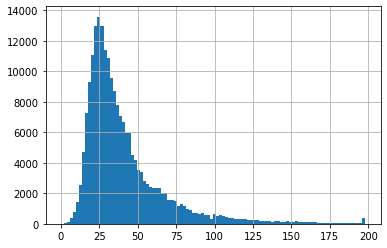

creating model...
start training...
0:	learn: 5.2814306	test: 5.2818964	best: 5.2818964 (0)	total: 3.35s	remaining: 1d 22h 31m 9s
25:	learn: 5.0861263	test: 5.0926152	best: 5.0926152 (25)	total: 1m 24s	remaining: 1d 21h 6m 11s
50:	learn: 4.9590650	test: 4.9687787	best: 4.9687787 (50)	total: 2m 43s	remaining: 1d 20h 24m 36s
75:	learn: 4.8582878	test: 4.8710677	best: 4.8710677 (75)	total: 4m 2s	remaining: 1d 20h 11m 19s
100:	learn: 4.7774383	test: 4.7928126	best: 4.7928126 (100)	total: 5m 20s	remaining: 1d 20h 26s
125:	learn: 4.7112797	test: 4.7288228	best: 4.7288228 (125)	total: 6m 39s	remaining: 1d 19h 53m 20s
150:	learn: 4.5639340	test: 4.5899248	best: 4.5899248 (150)	total: 8m 5s	remaining: 1d 20h 31m 19s
175:	learn: 4.4488289	test: 4.4822309	best: 4.4822309 (175)	total: 9m 32s	remaining: 1d 20h 59m 34s
200:	learn: 4.3536192	test: 4.3935370	best: 4.3935370 (200)	total: 10m 59s	remaining: 1d 21h 21m 13s
225:	learn: 4.2726583	test: 4.3185348	best: 4.3185348 (225)	total: 12m 25s	remaini

2000:	learn: 3.3617962	test: 3.5361144	best: 3.5361144 (2000)	total: 1h 52m 2s	remaining: 1d 20h 47m 46s
2025:	learn: 3.3594805	test: 3.5346596	best: 3.5346596 (2025)	total: 1h 53m 25s	remaining: 1d 20h 45m 56s
2050:	learn: 3.3573832	test: 3.5332480	best: 3.5332480 (2050)	total: 1h 54m 48s	remaining: 1d 20h 44m 10s
2075:	learn: 3.3554748	test: 3.5320218	best: 3.5320218 (2075)	total: 1h 56m 11s	remaining: 1d 20h 42m 11s
2100:	learn: 3.3533018	test: 3.5305209	best: 3.5305209 (2100)	total: 1h 57m 34s	remaining: 1d 20h 40m 19s
2125:	learn: 3.3509916	test: 3.5289356	best: 3.5289356 (2125)	total: 1h 58m 57s	remaining: 1d 20h 38m 39s
2150:	learn: 3.3490892	test: 3.5276559	best: 3.5276559 (2150)	total: 2h 19s	remaining: 1d 20h 36m 38s
2175:	learn: 3.3473217	test: 3.5264960	best: 3.5264960 (2175)	total: 2h 1m 41s	remaining: 1d 20h 34m 39s
2200:	learn: 3.3452894	test: 3.5251528	best: 3.5251528 (2200)	total: 2h 3m 4s	remaining: 1d 20h 32m 56s
2225:	learn: 3.3434052	test: 3.5239669	best: 3.5239669

3950:	learn: 3.2459002	test: 3.4640348	best: 3.4640348 (3950)	total: 3h 39m	remaining: 1d 18h 32m 35s
3975:	learn: 3.2447883	test: 3.4633398	best: 3.4633398 (3975)	total: 3h 40m 22s	remaining: 1d 18h 31m 1s
4000:	learn: 3.2436568	test: 3.4627504	best: 3.4627504 (4000)	total: 3h 41m 45s	remaining: 1d 18h 29m 27s
4025:	learn: 3.2426715	test: 3.4622354	best: 3.4622354 (4025)	total: 3h 43m 6s	remaining: 1d 18h 27m 48s
4050:	learn: 3.2415507	test: 3.4616467	best: 3.4616467 (4050)	total: 3h 44m 29s	remaining: 1d 18h 26m 16s
4075:	learn: 3.2405007	test: 3.4611084	best: 3.4611084 (4075)	total: 3h 45m 50s	remaining: 1d 18h 24m 36s
4100:	learn: 3.2394104	test: 3.4604423	best: 3.4604423 (4100)	total: 3h 47m 13s	remaining: 1d 18h 23m 6s
4125:	learn: 3.2383254	test: 3.4598302	best: 3.4598302 (4125)	total: 3h 48m 35s	remaining: 1d 18h 21m 35s
4150:	learn: 3.2371783	test: 3.4592116	best: 3.4592116 (4150)	total: 3h 49m 58s	remaining: 1d 18h 20m 10s
4175:	learn: 3.2362376	test: 3.4587103	best: 3.458710

5925:	learn: 3.1659066	test: 3.4205382	best: 3.4205382 (5925)	total: 5h 27m 39s	remaining: 1d 16h 36m 55s
5950:	learn: 3.1649456	test: 3.4199888	best: 3.4199888 (5950)	total: 5h 29m 1s	remaining: 1d 16h 35m 28s
5975:	learn: 3.1641224	test: 3.4195529	best: 3.4195529 (5975)	total: 5h 30m 24s	remaining: 1d 16h 34m
6000:	learn: 3.1633662	test: 3.4191618	best: 3.4191618 (6000)	total: 5h 31m 46s	remaining: 1d 16h 32m 30s
6025:	learn: 3.1625854	test: 3.4187943	best: 3.4187943 (6025)	total: 5h 33m 8s	remaining: 1d 16h 31m 3s
6050:	learn: 3.1617426	test: 3.4183127	best: 3.4183065 (6049)	total: 5h 34m 30s	remaining: 1d 16h 29m 36s
6075:	learn: 3.1609950	test: 3.4179837	best: 3.4179837 (6075)	total: 5h 35m 53s	remaining: 1d 16h 28m 9s
6100:	learn: 3.1601779	test: 3.4175412	best: 3.4175412 (6100)	total: 5h 37m 15s	remaining: 1d 16h 26m 40s
6125:	learn: 3.1594742	test: 3.4171295	best: 3.4171295 (6125)	total: 5h 38m 37s	remaining: 1d 16h 25m 9s
6150:	learn: 3.1587364	test: 3.4168137	best: 3.4168137 

7875:	learn: 3.1117162	test: 3.3933847	best: 3.3933847 (7875)	total: 7h 14m 19s	remaining: 1d 14h 42m 55s
7900:	learn: 3.1111883	test: 3.3931668	best: 3.3931668 (7900)	total: 7h 15m 41s	remaining: 1d 14h 41m 30s
7925:	learn: 3.1106521	test: 3.3928853	best: 3.3928853 (7925)	total: 7h 17m 3s	remaining: 1d 14h 40m 1s
7950:	learn: 3.1100600	test: 3.3926342	best: 3.3926342 (7950)	total: 7h 18m 25s	remaining: 1d 14h 38m 36s
7975:	learn: 3.1094731	test: 3.3923798	best: 3.3923798 (7975)	total: 7h 19m 47s	remaining: 1d 14h 37m 11s
8000:	learn: 3.1088276	test: 3.3921075	best: 3.3921075 (8000)	total: 7h 21m 10s	remaining: 1d 14h 35m 47s
8025:	learn: 3.1082585	test: 3.3918328	best: 3.3918328 (8025)	total: 7h 22m 32s	remaining: 1d 14h 34m 21s
8050:	learn: 3.1077931	test: 3.3915985	best: 3.3915985 (8050)	total: 7h 23m 53s	remaining: 1d 14h 32m 50s
8075:	learn: 3.1073103	test: 3.3913450	best: 3.3913450 (8075)	total: 7h 25m 14s	remaining: 1d 14h 31m 22s
8100:	learn: 3.1066977	test: 3.3910055	best: 3.3

9825:	learn: 3.0741200	test: 3.3774380	best: 3.3774380 (9825)	total: 9h 59s	remaining: 1d 12h 51m 52s
9850:	learn: 3.0737345	test: 3.3772738	best: 3.3772738 (9850)	total: 9h 2m 21s	remaining: 1d 12h 50m 25s
9875:	learn: 3.0733933	test: 3.3771141	best: 3.3771141 (9875)	total: 9h 3m 42s	remaining: 1d 12h 48m 59s
9900:	learn: 3.0729601	test: 3.3769287	best: 3.3769278 (9899)	total: 9h 5m 4s	remaining: 1d 12h 47m 34s
9925:	learn: 3.0725233	test: 3.3767108	best: 3.3767105 (9924)	total: 9h 6m 26s	remaining: 1d 12h 46m 9s
9950:	learn: 3.0720984	test: 3.3765755	best: 3.3765755 (9950)	total: 9h 7m 48s	remaining: 1d 12h 44m 45s
9975:	learn: 3.0716858	test: 3.3764143	best: 3.3764143 (9975)	total: 9h 9m 10s	remaining: 1d 12h 43m 18s
10000:	learn: 3.0712463	test: 3.3762489	best: 3.3762456 (9999)	total: 9h 10m 32s	remaining: 1d 12h 41m 53s
10025:	learn: 3.0708928	test: 3.3760820	best: 3.3760772 (10024)	total: 9h 11m 54s	remaining: 1d 12h 40m 27s
10050:	learn: 3.0705256	test: 3.3758897	best: 3.3758897

11750:	learn: 3.0447631	test: 3.3658384	best: 3.3658384 (11750)	total: 10h 45m 46s	remaining: 1d 11h 1m 57s
11775:	learn: 3.0444317	test: 3.3657034	best: 3.3657034 (11775)	total: 10h 47m 7s	remaining: 1d 11h 31s
11800:	learn: 3.0441179	test: 3.3655748	best: 3.3655748 (11800)	total: 10h 48m 28s	remaining: 1d 10h 59m 5s
11825:	learn: 3.0437716	test: 3.3654604	best: 3.3654604 (11825)	total: 10h 49m 50s	remaining: 1d 10h 57m 39s
11850:	learn: 3.0434151	test: 3.3653359	best: 3.3653353 (11846)	total: 10h 51m 11s	remaining: 1d 10h 56m 14s
11875:	learn: 3.0430694	test: 3.3652024	best: 3.3652024 (11875)	total: 10h 52m 33s	remaining: 1d 10h 54m 48s
11900:	learn: 3.0427356	test: 3.3651580	best: 3.3651484 (11896)	total: 10h 53m 55s	remaining: 1d 10h 53m 24s
11925:	learn: 3.0423794	test: 3.3649749	best: 3.3649749 (11925)	total: 10h 55m 16s	remaining: 1d 10h 51m 58s
11950:	learn: 3.0420773	test: 3.3648564	best: 3.3648564 (11950)	total: 10h 56m 37s	remaining: 1d 10h 50m 33s
11975:	learn: 3.0417187	te

13675:	learn: 3.0210294	test: 3.3571115	best: 3.3571115 (13675)	total: 12h 30m 12s	remaining: 1d 9h 12m 34s
13700:	learn: 3.0207511	test: 3.3570309	best: 3.3570309 (13700)	total: 12h 31m 33s	remaining: 1d 9h 11m 10s
13725:	learn: 3.0204278	test: 3.3568601	best: 3.3568601 (13725)	total: 12h 32m 55s	remaining: 1d 9h 9m 46s
13750:	learn: 3.0201456	test: 3.3566947	best: 3.3566947 (13750)	total: 12h 34m 16s	remaining: 1d 9h 8m 21s
13775:	learn: 3.0198781	test: 3.3565508	best: 3.3565508 (13775)	total: 12h 35m 38s	remaining: 1d 9h 6m 58s
13800:	learn: 3.0196005	test: 3.3564636	best: 3.3564600 (13799)	total: 12h 36m 59s	remaining: 1d 9h 5m 32s
13825:	learn: 3.0193261	test: 3.3563295	best: 3.3563295 (13825)	total: 12h 38m 21s	remaining: 1d 9h 4m 7s
13850:	learn: 3.0190296	test: 3.3562065	best: 3.3562065 (13850)	total: 12h 39m 42s	remaining: 1d 9h 2m 43s
13875:	learn: 3.0186970	test: 3.3560438	best: 3.3560438 (13875)	total: 12h 41m 3s	remaining: 1d 9h 1m 18s
13900:	learn: 3.0184089	test: 3.35591

15600:	learn: 3.0001364	test: 3.3498311	best: 3.3498287 (15598)	total: 14h 15m 11s	remaining: 1d 7h 25m 37s
15625:	learn: 2.9998224	test: 3.3497412	best: 3.3497412 (15625)	total: 14h 16m 38s	remaining: 1d 7h 24m 27s
15650:	learn: 2.9995339	test: 3.3495639	best: 3.3495639 (15650)	total: 14h 18m 5s	remaining: 1d 7h 23m 14s
15675:	learn: 2.9992434	test: 3.3494412	best: 3.3494409 (15673)	total: 14h 19m 32s	remaining: 1d 7h 22m 3s
15700:	learn: 2.9989885	test: 3.3493459	best: 3.3493459 (15700)	total: 14h 20m 58s	remaining: 1d 7h 20m 49s
15725:	learn: 2.9987213	test: 3.3492486	best: 3.3492486 (15725)	total: 14h 22m 21s	remaining: 1d 7h 19m 28s
15750:	learn: 2.9984833	test: 3.3491769	best: 3.3491769 (15750)	total: 14h 23m 44s	remaining: 1d 7h 18m 6s
15775:	learn: 2.9982227	test: 3.3490921	best: 3.3490921 (15775)	total: 14h 25m 6s	remaining: 1d 7h 16m 45s
15800:	learn: 2.9979871	test: 3.3490306	best: 3.3490306 (15800)	total: 14h 26m 30s	remaining: 1d 7h 15m 25s
15825:	learn: 2.9977468	test: 3.

17525:	learn: 2.9821813	test: 3.3439324	best: 3.3439324 (17525)	total: 16h 2m 19s	remaining: 1d 5h 43m 5s
17550:	learn: 2.9819691	test: 3.3438844	best: 3.3438802 (17548)	total: 16h 3m 40s	remaining: 1d 5h 41m 41s
17575:	learn: 2.9817911	test: 3.3438482	best: 3.3438437 (17566)	total: 16h 5m 2s	remaining: 1d 5h 40m 17s
17600:	learn: 2.9815597	test: 3.3437593	best: 3.3437593 (17600)	total: 16h 6m 24s	remaining: 1d 5h 38m 53s
17625:	learn: 2.9813776	test: 3.3437270	best: 3.3437231 (17624)	total: 16h 7m 45s	remaining: 1d 5h 37m 29s
17650:	learn: 2.9811008	test: 3.3436327	best: 3.3436327 (17650)	total: 16h 9m 7s	remaining: 1d 5h 36m 6s
17675:	learn: 2.9808515	test: 3.3435303	best: 3.3435261 (17672)	total: 16h 10m 29s	remaining: 1d 5h 34m 43s
17700:	learn: 2.9806013	test: 3.3434138	best: 3.3434135 (17699)	total: 16h 11m 50s	remaining: 1d 5h 33m 19s
17725:	learn: 2.9803613	test: 3.3433099	best: 3.3433045 (17724)	total: 16h 13m 12s	remaining: 1d 5h 31m 56s
17750:	learn: 2.9801646	test: 3.343228

19450:	learn: 2.9660728	test: 3.3382828	best: 3.3382828 (19450)	total: 17h 46m 49s	remaining: 1d 3h 55m 30s
19475:	learn: 2.9658346	test: 3.3382225	best: 3.3382165 (19473)	total: 17h 48m 11s	remaining: 1d 3h 54m 7s
19500:	learn: 2.9656500	test: 3.3381732	best: 3.3381732 (19500)	total: 17h 49m 31s	remaining: 1d 3h 52m 43s
19525:	learn: 2.9654461	test: 3.3380899	best: 3.3380899 (19525)	total: 17h 50m 52s	remaining: 1d 3h 51m 18s
19550:	learn: 2.9652407	test: 3.3380376	best: 3.3380248 (19543)	total: 17h 52m 14s	remaining: 1d 3h 49m 55s
19575:	learn: 2.9650577	test: 3.3379717	best: 3.3379717 (19575)	total: 17h 53m 35s	remaining: 1d 3h 48m 30s
19600:	learn: 2.9648630	test: 3.3379233	best: 3.3379233 (19600)	total: 17h 54m 56s	remaining: 1d 3h 47m 6s
19625:	learn: 2.9646788	test: 3.3378785	best: 3.3378785 (19625)	total: 17h 56m 17s	remaining: 1d 3h 45m 42s
19650:	learn: 2.9644725	test: 3.3378284	best: 3.3378263 (19647)	total: 17h 57m 38s	remaining: 1d 3h 44m 18s
19675:	learn: 2.9642847	test: 

21375:	learn: 2.9519103	test: 3.3340555	best: 3.3340543 (21374)	total: 19h 30m 44s	remaining: 1d 2h 7m 42s
21400:	learn: 2.9517467	test: 3.3339913	best: 3.3339913 (21400)	total: 19h 32m 5s	remaining: 1d 2h 6m 18s
21425:	learn: 2.9515574	test: 3.3339029	best: 3.3339029 (21425)	total: 19h 33m 26s	remaining: 1d 2h 4m 54s
21450:	learn: 2.9513923	test: 3.3338620	best: 3.3338620 (21450)	total: 19h 34m 47s	remaining: 1d 2h 3m 31s
21475:	learn: 2.9511588	test: 3.3337954	best: 3.3337954 (21475)	total: 19h 36m 8s	remaining: 1d 2h 2m 8s
21500:	learn: 2.9509961	test: 3.3337252	best: 3.3337252 (21500)	total: 19h 37m 29s	remaining: 1d 2h 43s
21525:	learn: 2.9507788	test: 3.3336670	best: 3.3336593 (21524)	total: 19h 38m 50s	remaining: 1d 1h 59m 20s
21550:	learn: 2.9506313	test: 3.3335963	best: 3.3335954 (21549)	total: 19h 40m 10s	remaining: 1d 1h 57m 55s
21575:	learn: 2.9504330	test: 3.3335440	best: 3.3335372 (21571)	total: 19h 41m 32s	remaining: 1d 1h 56m 32s
21600:	learn: 2.9502724	test: 3.3334676	

23325:	learn: 2.9388602	test: 3.3300112	best: 3.3300028 (23323)	total: 21h 15m 51s	remaining: 1d 18m 58s
23350:	learn: 2.9387068	test: 3.3300040	best: 3.3300019 (23349)	total: 21h 17m 11s	remaining: 1d 17m 34s
23375:	learn: 2.9385426	test: 3.3299622	best: 3.3299523 (23371)	total: 21h 18m 32s	remaining: 1d 16m 11s
23400:	learn: 2.9383625	test: 3.3298935	best: 3.3298905 (23398)	total: 21h 19m 53s	remaining: 1d 14m 48s
23425:	learn: 2.9381765	test: 3.3298186	best: 3.3298186 (23425)	total: 21h 21m 14s	remaining: 1d 13m 25s
23450:	learn: 2.9380099	test: 3.3297899	best: 3.3297851 (23449)	total: 21h 22m 35s	remaining: 1d 12m 2s
23475:	learn: 2.9378601	test: 3.3297186	best: 3.3297186 (23475)	total: 21h 23m 56s	remaining: 1d 10m 38s
23500:	learn: 2.9377230	test: 3.3296929	best: 3.3296923 (23498)	total: 21h 25m 17s	remaining: 1d 9m 15s
23525:	learn: 2.9375830	test: 3.3296514	best: 3.3296514 (23525)	total: 21h 26m 37s	remaining: 1d 7m 51s
23550:	learn: 2.9373776	test: 3.3295794	best: 3.3295794 (2

25275:	learn: 2.9266939	test: 3.3264541	best: 3.3264466 (25268)	total: 23h 55s	remaining: 22h 30m 46s
25300:	learn: 2.9265163	test: 3.3263998	best: 3.3263998 (25300)	total: 23h 2m 16s	remaining: 22h 29m 23s
25325:	learn: 2.9263416	test: 3.3263326	best: 3.3263326 (25325)	total: 23h 3m 37s	remaining: 22h 28m
25350:	learn: 2.9261619	test: 3.3262941	best: 3.3262887 (25334)	total: 23h 4m 58s	remaining: 22h 26m 37s
25375:	learn: 2.9260484	test: 3.3262875	best: 3.3262860 (25374)	total: 23h 6m 19s	remaining: 22h 25m 14s
25400:	learn: 2.9258950	test: 3.3262153	best: 3.3262153 (25400)	total: 23h 7m 40s	remaining: 22h 23m 51s
25425:	learn: 2.9257603	test: 3.3261609	best: 3.3261609 (25425)	total: 23h 9m	remaining: 22h 22m 28s
25450:	learn: 2.9256143	test: 3.3261406	best: 3.3261406 (25450)	total: 23h 10m 21s	remaining: 22h 21m 5s
25475:	learn: 2.9254734	test: 3.3260949	best: 3.3260949 (25475)	total: 23h 11m 42s	remaining: 22h 19m 42s
25500:	learn: 2.9253223	test: 3.3260645	best: 3.3260639 (25495)	t

27250:	learn: 2.9157532	test: 3.3232473	best: 3.3232434 (27246)	total: 1d 47m 12s	remaining: 20h 41m 31s
27275:	learn: 2.9156296	test: 3.3232147	best: 3.3232132 (27268)	total: 1d 48m 33s	remaining: 20h 40m 8s
27300:	learn: 2.9155045	test: 3.3231819	best: 3.3231810 (27295)	total: 1d 49m 54s	remaining: 20h 38m 45s
27325:	learn: 2.9153824	test: 3.3231667	best: 3.3231646 (27322)	total: 1d 51m 14s	remaining: 20h 37m 22s
27350:	learn: 2.9152531	test: 3.3231072	best: 3.3231072 (27350)	total: 1d 52m 35s	remaining: 20h 35m 59s
27375:	learn: 2.9151202	test: 3.3230347	best: 3.3230347 (27375)	total: 1d 53m 56s	remaining: 20h 34m 37s
27400:	learn: 2.9149742	test: 3.3229863	best: 3.3229857 (27399)	total: 1d 55m 17s	remaining: 20h 33m 14s
27425:	learn: 2.9148733	test: 3.3229490	best: 3.3229490 (27425)	total: 1d 56m 37s	remaining: 20h 31m 51s
27450:	learn: 2.9147184	test: 3.3229323	best: 3.3229287 (27447)	total: 1d 57m 58s	remaining: 20h 30m 28s
27475:	learn: 2.9145819	test: 3.3228577	best: 3.3228577 

29175:	learn: 2.9058890	test: 3.3203647	best: 3.3203647 (29175)	total: 1d 2h 30m 42s	remaining: 18h 55m 21s
29200:	learn: 2.9057613	test: 3.3203468	best: 3.3203417 (29193)	total: 1d 2h 32m 3s	remaining: 18h 53m 58s
29225:	learn: 2.9056487	test: 3.3203477	best: 3.3203417 (29193)	total: 1d 2h 33m 24s	remaining: 18h 52m 36s
29250:	learn: 2.9055129	test: 3.3203053	best: 3.3203053 (29250)	total: 1d 2h 34m 45s	remaining: 18h 51m 13s
29275:	learn: 2.9054319	test: 3.3202769	best: 3.3202730 (29272)	total: 1d 2h 36m 5s	remaining: 18h 49m 50s
29300:	learn: 2.9053197	test: 3.3202656	best: 3.3202656 (29300)	total: 1d 2h 37m 25s	remaining: 18h 48m 27s
29325:	learn: 2.9052388	test: 3.3202548	best: 3.3202548 (29322)	total: 1d 2h 38m 46s	remaining: 18h 47m 5s
29350:	learn: 2.9051429	test: 3.3202551	best: 3.3202548 (29322)	total: 1d 2h 40m 6s	remaining: 18h 45m 42s
29375:	learn: 2.9050313	test: 3.3202202	best: 3.3202196 (29373)	total: 1d 2h 41m 26s	remaining: 18h 44m 19s
29400:	learn: 2.9049286	test: 3.

31100:	learn: 2.8969158	test: 3.3181825	best: 3.3181825 (31100)	total: 1d 4h 14m 3s	remaining: 17h 9m 25s
31125:	learn: 2.8968194	test: 3.3181726	best: 3.3181706 (31123)	total: 1d 4h 15m 24s	remaining: 17h 8m 3s
31150:	learn: 2.8967128	test: 3.3181371	best: 3.3181326 (31139)	total: 1d 4h 16m 44s	remaining: 17h 6m 40s
31175:	learn: 2.8966167	test: 3.3181093	best: 3.3181082 (31174)	total: 1d 4h 18m 5s	remaining: 17h 5m 18s
31200:	learn: 2.8964972	test: 3.3180780	best: 3.3180780 (31200)	total: 1d 4h 19m 25s	remaining: 17h 3m 55s
31225:	learn: 2.8963721	test: 3.3180532	best: 3.3180499 (31221)	total: 1d 4h 20m 45s	remaining: 17h 2m 33s
31250:	learn: 2.8962521	test: 3.3180311	best: 3.3180293 (31247)	total: 1d 4h 22m 6s	remaining: 17h 1m 10s
31275:	learn: 2.8961724	test: 3.3180210	best: 3.3180114 (31266)	total: 1d 4h 23m 26s	remaining: 16h 59m 48s
31300:	learn: 2.8960261	test: 3.3179741	best: 3.3179741 (31300)	total: 1d 4h 24m 47s	remaining: 16h 58m 25s
31325:	learn: 2.8959007	test: 3.3179550

33025:	learn: 2.8882868	test: 3.3161421	best: 3.3161406 (33024)	total: 1d 5h 58m 14s	remaining: 15h 24m 13s
33050:	learn: 2.8882382	test: 3.3161436	best: 3.3161368 (33039)	total: 1d 5h 59m 37s	remaining: 15h 22m 52s
33075:	learn: 2.8881044	test: 3.3161141	best: 3.3161069 (33073)	total: 1d 6h 1m 1s	remaining: 15h 21m 31s
33100:	learn: 2.8880023	test: 3.3160881	best: 3.3160815 (33095)	total: 1d 6h 2m 25s	remaining: 15h 20m 11s
33125:	learn: 2.8879184	test: 3.3160875	best: 3.3160788 (33105)	total: 1d 6h 3m 49s	remaining: 15h 18m 50s
33150:	learn: 2.8878417	test: 3.3160869	best: 3.3160788 (33105)	total: 1d 6h 5m 12s	remaining: 15h 17m 29s
33175:	learn: 2.8877085	test: 3.3160523	best: 3.3160403 (33169)	total: 1d 6h 6m 36s	remaining: 15h 16m 9s
33200:	learn: 2.8876297	test: 3.3160299	best: 3.3160281 (33197)	total: 1d 6h 8m	remaining: 15h 14m 48s
33225:	learn: 2.8875112	test: 3.3160167	best: 3.3160147 (33224)	total: 1d 6h 9m 23s	remaining: 15h 13m 28s
33250:	learn: 2.8873798	test: 3.3159800	b

In [ ]:
count = 0

for train_idx, val_idx in gkf.split(training_data_df, groups=training_data_df['지번주소']):
    print('Fold {} start'.format(count))
    
    print('creating fold data...')
    train_data = training_data_df.loc[train_idx].sample(frac=1).reset_index(drop=True)
    val_data = training_data_df.loc[val_idx]
    
    x_train = train_data.drop(columns=cols_to_drop)
    y_train = train_data['가격_면적_classes']
    
    print(x_train.shape)
    
    x_val = val_data.drop(columns=cols_to_drop)
    y_val = val_data['가격_면적_classes']
    
    print(y_train.nunique())
    
    print('y dist plot')
    y_val.hist(bins=100)
    plt.show()
    plt.clf()
    
    print('creating model...')
    train_pool = Pool(x_train, y_train, cat_features=cat_cols)
    val_pool = Pool(x_val, y_val, cat_features=cat_cols)
    
    model = CatBoostClassifier(iterations=50000, learning_rate=0.003, loss_function='MultiClass', custom_metric='MultiClass',
                               classes_count=199, thread_count=6, task_type='GPU'
                              )
     
    print('start training...')
    model.fit(train_pool, use_best_model=True, eval_set=val_pool, verbose=25, early_stopping_rounds=100)
    
    print('saving model...')
    model.save_model(basedir + 'catboost_multiclass_lower_lr_{}'.format(count))
    
    print('Fold {} end'.format(count))
    count += 1